In [261]:
import pandas as pd
import sqlite3 as sq
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns

In [262]:
online_store=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2.csv", delimiter=";")
orders=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Order-Order.csv", delimiter=";")
customers=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Customer-Customer.csv",delimiter=";")
products=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Product-Table 1.csv",delimiter=";")
sales=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Sales-Sales.csv",delimiter=";")
shipment=pd.read_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/Sample-Superstore2/Shipment-Shipment.csv",delimiter=";")

FULL TABLE FOR EDA 

In [263]:
#Additional DataFrame with correct product_id
products2=products.iloc[:,[0,3,4]]

In [264]:
online_store.drop(labels="Row ID",axis=1,inplace=True)

In [265]:
online_store.rename(columns={"Order ID":"Order_ID","Order Date":"Order_Date","Ship Date":"Ship_Date","Ship Mode":"Ship_Mode","Customer ID":"Customer_ID","Customer Name":"Customer_Name","Postal Code":"Postal_Code","Product ID":"Product_ID","Sub-Category":"Sub_Category","Product Name":"Product_Name"},inplace=True)

In [266]:
online_store=pd.merge(online_store,products2,how="left",on=["Product_ID","Product_Name"])

In [267]:
online_store.drop(labels="Product_ID",axis=1,inplace=True)
online_store.rename(columns={"Product_ID_NEW":"Product_ID"},inplace=True)

In [268]:
online_store=online_store.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,19,12,13,14,15,16,17,18]]

In [269]:
# date
online_store["Order_Date"]=online_store["Order_Date"].astype("datetime64[ns]")

In [270]:
online_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order_ID       9994 non-null   object        
 1   Order_Date     9994 non-null   datetime64[ns]
 2   Ship_Date      9994 non-null   object        
 3   Ship_Mode      9994 non-null   object        
 4   Customer_ID    9994 non-null   object        
 5   Customer_Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal_Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product_ID     9717 non-null   object        
 13  Category       9994 non-null   object        
 14  Sub_Category   9994 non-null   object        
 15  Product_Name   9994 n

REPLACING WRONG Product_ID

In [271]:
sales=pd.merge(sales,products,how="left",on=["Product_ID","Product_Name"])

In [272]:
sales.drop(labels=["Product_ID",'Sub_Category','Category','Product_Name'],axis=1,inplace=True)
products.drop(labels=["Product_ID"],axis=1,inplace=True)


In [273]:

sales.rename(columns={"Product_ID_NEW":"Product_ID"},inplace=True)
products.rename(columns={"Product_ID_NEW":"Product_ID"},inplace=True)

In [274]:
orders = orders.assign(id=range(1,1+len(orders)))

In [275]:
sales=sales.iloc[:,[0,1,6,2,3,4,5]]
products=products.iloc[:,[3,0,1,2]]

ADD COLUMNS 

In [276]:
online_store.head(5)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [277]:
online_store["Price"]=(online_store["Sales"]/(1-online_store["Discount"]))/online_store["Quantity"]

In [278]:
online_store["Margin"]=online_store["Profit"]/online_store["Sales"]

In [279]:
online_store.to_excel("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/online_store.xlsx")

In [280]:
online_store.to_csv("/Users/Yanaorfin_1/Documents/Academy/E_Commerce/online_store.csv")

In [281]:
online_store.head(1)

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Price,Margin
0,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,130.98,0.16


In [282]:
order_list=online_store[["Order_ID","Sub_Category","Quantity"]]

df_chairs = df[df['category']=='Chairs'].set_index('order_id').drop(['category', 'sale_value'], axis=1).add_prefix('chair_')
df_tables = df[df['category']=='Tables'].set_index('order_id').drop(['category', 'sale_value'], axis=1).add_prefix('table_')

df = df_tables.join(df_chairs)

df_out = df.groupby(['table_product_id', 'chair_product_id']).agg(sum)
df_out['times_sold'] = df.groupby(['table_product_id', 'chair_product_id']).size()
print(df_out)

In [283]:
sub_categories_list=order_list["Sub_Category"].unique().tolist()

In [284]:
sub_categories_list

['Bookcases',
 'Chairs',
 'Labels',
 'Tables',
 'Storage',
 'Furnishings',
 'Art',
 'Phones',
 'Binders',
 'Appliances',
 'Paper',
 'Accessories',
 'Envelopes',
 'Fasteners',
 'Supplies',
 'Machines',
 'Copiers']

In [285]:
df_Bookcases = order_list[order_list['Sub_Category']=='Bookcases'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Bookcases')
df_Chairs = order_list[order_list['Sub_Category']=='Chairs'].set_index('Order_ID').drop(['Sub_Category',"Quantity"], axis=1).add_prefix('Chairs')
df_Labels = order_list[order_list['Sub_Category']=='Labels'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Labels')
df_Tables = order_list[order_list['Sub_Category']=='Tables'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Tables')
df_Storage = order_list[order_list['Sub_Category']=='Storage'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Storage')
df_Furnishings = order_list[order_list['Sub_Category']=='Furnishings'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Furnishings')
df_Art = order_list[order_list['Sub_Category']=='Art'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Art')
df_Phones = order_list[order_list['Sub_Category']=='Phones'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Phones')
df_Binders = order_list[order_list['Sub_Category']=='Binders'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Binders')
df_Appliances = order_list[order_list['Sub_Category']=='Appliances'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Appliances')
df_Paper = order_list[order_list['Sub_Category']=='Paper'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Paper')
df_Accessories = order_list[order_list['Sub_Category']=='Accessories'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Accessories')
df_Envelopes = order_list[order_list['Sub_Category']=='Envelopes'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Envelopes')
df_Fasteners = order_list[order_list['Sub_Category']=='Fasteners'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Fasteners')
df_Supplies = order_list[order_list['Sub_Category']=='Supplies'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Supplies')
df_Machines = order_list[order_list['Sub_Category']=='Machines'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Machines')
df_Copiers = order_list[order_list['Sub_Category']=='Copiers'].set_index('Order_ID').drop(['Sub_Category'], axis=1).add_prefix('Copiers')



In [286]:
df_orders=df_Bookcases.join(df_Chairs)

In [287]:
df_orders2=df_orders.join(df_Labels)

In [288]:
df_orders2.head(2)

,BookcasesQuantity,LabelsQuantity
Order_ID,,
CA-2014-101931,6,NaN
CA-2014-105249,4,4.0


In [289]:
df_orders2["Total"]=df_orders2["BookcasesQuantity"]+df_orders2["LabelsQuantity"]
df_orders2["Total"]=df_orders2["Total"].apply(lambda x:1 if x>0 else 0)

In [290]:
df_orders2.head(30)

,BookcasesQuantity,LabelsQuantity,Total
Order_ID,,,
CA-2014-101931,6,NaN,0
CA-2014-105249,4,4.0,1
CA-2014-111192,8,NaN,0
CA-2014-111871,10,NaN,0
CA-2014-112158,5,NaN,0
CA-2014-113271,1,NaN,0
CA-2014-114181,7,NaN,0
CA-2014-115161,2,NaN,0
CA-2014-119144,3,NaN,0


In [291]:
order_list_melt=pd.melt(order_list,id_vars=["Sub_Category"],value_vars=["Order_ID","Quantity"])

In [292]:
order_list_melt

,Sub_Category,variable,value
0,Bookcases,Order_ID,CA-2016-152156
1,Chairs,Order_ID,CA-2016-152156
2,Labels,Order_ID,CA-2016-138688
3,Tables,Order_ID,US-2015-108966
4,Storage,Order_ID,US-2015-108966
...,...,...,...
19983,Furnishings,Quantity,3
19984,Furnishings,Quantity,2
19985,Phones,Quantity,2
19986,Paper,Quantity,4


In [293]:
#order_list.pivot(index="Order_ID",columns="Sub_Category")["Quantity"]

Parameters to understand customers buying pattern

In [294]:

df_monetary=online_store.groupby("Customer_ID")["Sales"].sum()
df_monetary=df_monetary.reset_index()
df_monetary.head()

,Customer_ID,Sales
0,AA-10315,5563.560
1,AA-10375,1056.390
2,AA-10480,1790.512
3,AA-10645,5086.935
4,AB-10015,886.156


In [295]:
df_frequency=online_store.groupby("Customer_ID")["Order_ID"].nunique()
df_frequency=df_frequency.reset_index()
df_frequency["Frequency"]=df_frequency['Order_ID']
df_frequency.drop(labels='Order_ID',axis=1, inplace=True)
df_frequency.head()

,Customer_ID,Frequency
0,AA-10315,5
1,AA-10375,9
2,AA-10480,4
3,AA-10645,6
4,AB-10015,3


In [296]:
df_recency=online_store.groupby("Customer_ID")["Order_Date"].max()
df_recency=df_recency.reset_index()
df_recency["Recency"]=online_store["Order_Date"].max()-df_recency["Order_Date"]
df_recency.drop(labels="Order_Date",axis=1,inplace=True)
df_recency.head()

,Customer_ID,Recency
0,AA-10315,184 days
1,AA-10375,19 days
2,AA-10480,259 days
3,AA-10645,55 days
4,AB-10015,415 days


In [316]:
metrics=pd.merge(pd.merge(df_monetary,df_frequency,on="Customer_ID"),df_recency,on="Customer_ID")
metrics.head(5)



,Customer_ID,Sales,Frequency,Recency
0,AA-10315,5563.560,5,184 days
1,AA-10375,1056.390,9,19 days
2,AA-10480,1790.512,4,259 days
3,AA-10645,5086.935,6,55 days
4,AB-10015,886.156,3,415 days


In [317]:
metrics["Recency"]=pd.to_numeric(metrics["Recency"].dt.days,downcast="integer")

In [318]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 793 entries, 0 to 792
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer_ID  793 non-null    object 
 1   Sales        793 non-null    float64
 2   Frequency    793 non-null    int64  
 3   Recency      793 non-null    int16  
dtypes: float64(1), int16(1), int64(1), object(1)
memory usage: 26.3+ KB


<AxesSubplot:>

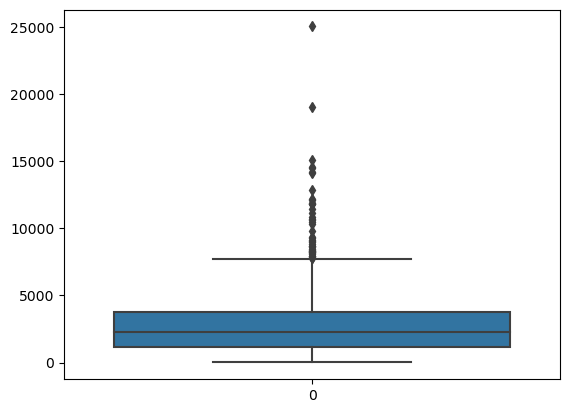

In [321]:
sns.boxplot(data=metrics["Sales"])

<AxesSubplot:>

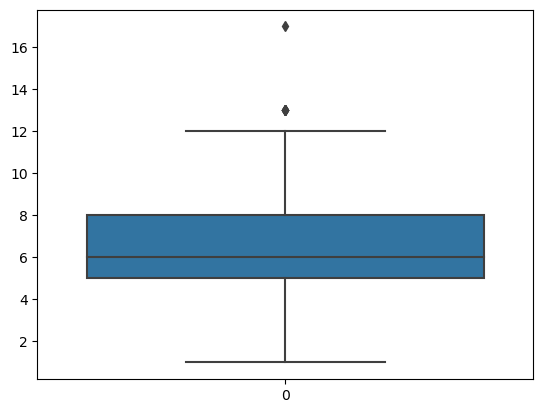

In [322]:
sns.boxplot(data=metrics["Frequency"])

<AxesSubplot:>

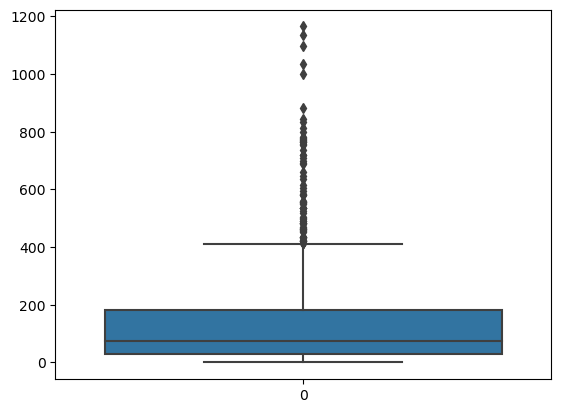

In [323]:
sns.boxplot(data=metrics["Recency"])

Removing outlires (IQR method)

In [324]:
metrics.describe()

,Sales,Frequency,Recency
count,793.000000,793.000000,793.000000
mean,2903.709224,6.316520,146.802018
std,2629.986619,2.550885,186.211051
min,4.833000,1.000000,0.000000
25%,1148.780000,5.000000,30.000000
50%,2260.958000,6.000000,75.000000
75%,3789.722800,8.000000,183.000000
max,25043.050000,17.000000,1165.000000


In [325]:
Q1=metrics.quantile(0.25)
Q3=metrics.quantile(0.75)
Q1,Q3

(Sales        1148.78
 Frequency       5.00
 Recency        30.00
 Name: 0.25, dtype: float64,
 Sales        3789.7228
 Frequency       8.0000
 Recency       183.0000
 Name: 0.75, dtype: float64)

In [326]:
IQR=Q3-Q1
IQR

Sales        2640.9428
Frequency       3.0000
Recency       153.0000
dtype: float64

In [327]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit

(Sales       -2812.6342
 Frequency       0.5000
 Recency      -199.5000
 dtype: float64,
 Sales        7751.137
 Frequency      12.500
 Recency       412.500
 dtype: float64)

In [328]:
metrics[(metrics<lower_limit)|(metrics>upper_limit)]

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_8693/115098341.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  metrics[(metrics<lower_limit)|(metrics>upper_limit)]


,Customer_ID,Sales,Frequency,Recency
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,415.0
...,...,...,...,...
788,NaN,NaN,NaN,NaN
789,NaN,NaN,NaN,NaN
790,NaN,NaN,NaN,NaN
791,NaN,8469.263,13.0,NaN


In [333]:
metrics_no_outlier=metrics[(metrics<lower_limit)&(metrics>upper_limit)]
metrics_no_outlier

/var/folders/0g/qs1_nm7j3n30v6qskgpxqmd80000gn/T/ipykernel_8693/3717670723.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  metrics_no_outlier=metrics[(metrics<lower_limit)&(metrics>upper_limit)]


,Customer_ID,Sales,Frequency,Recency
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
788,NaN,NaN,NaN,NaN
789,NaN,NaN,NaN,NaN
790,NaN,NaN,NaN,NaN
791,NaN,NaN,NaN,NaN


K-MEANS  CLUSTERING